In [157]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.lines import Line2D
from matplotlib.patches import Patch

In [2]:
def read_data (path):
    lines = []
    with open(path) as f:
        for l in f.readlines():
            split = [t.strip().split() for t in l.strip().split(',')]
            item = dict()
            for s in split:
                for kv in s:
                    k, v = s[0][:-1], s[1]
                    if k == 'duration' or k == 'msg_len' or k == 'iteration' or k== 'n_threads':
                        v = int(v)
                    elif k == 'elapsed':
                        v = float(v) if v != 'too_large' else -1
                item[k] = v     
            lines.append(item)
    return lines

normal_data = pd.DataFrame(read_data("./01_normal_results.txt"))
omp_data = pd.DataFrame(read_data("./02_omp_results.txt"))
cuda_data = pd.DataFrame(read_data("./03_cuda_results.txt"))
mpi_data = pd.DataFrame(read_data("./04_mpi_results.txt"))

normal_data['type'] = 'baseline'
omp_data['type'] = 'omp'
cuda_data['type'] = 'cuda'
mpi_data['type'] = 'mpi'

In [83]:
mpi_data

,duration,msg_len,n_ranks,iteration,elapsed,type
0,1,100,1,1,1.070032,mpi
1,1,100,1,2,1.068186,mpi
2,1,100,1,3,1.081249,mpi
3,1,100,1,4,1.065976,mpi
4,1,100,1,5,1.063503,mpi
...,...,...,...,...,...,...
595,40,1000000,4,1,-1.000000,mpi
596,40,1000000,4,2,-1.000000,mpi
597,40,1000000,4,3,-1.000000,mpi
598,40,1000000,4,4,-1.000000,mpi


In [124]:
def plot_time(df, x_att, y_att, hue_att, ax):
    df = df.groupby([x_att, hue_att])[y_att].agg(['mean', 'std']).reset_index()
    for hue in df[hue_att].unique():
        x = df[df[hue_att] == hue][x_att]
        y = df[df[hue_att] == hue]['mean']
        ax.plot(x, y, label=hue);

def plot_speedup(df, baseline, x_att, hue_att, ax):
    df = df.groupby([x_att, hue_att]).agg(elapsed=('elapsed', 'mean')).reset_index()
    baseline = baseline.groupby([hue_att]).agg(baseline=('elapsed', 'mean')).reset_index()
    df = pd.merge(df, baseline, on=hue_att)
    df['speedup'] = df['baseline'] / df['elapsed']
    for hue in df[hue_att].unique():
        x = df[df[hue_att] == hue][x_att]
        y = df[df[hue_att] == hue]['speedup']
        ax.plot(x, y, label=hue)
    ax.axhline(y=1, color='black', linestyle='--', label='baseline')

PLOTS FOR OMP


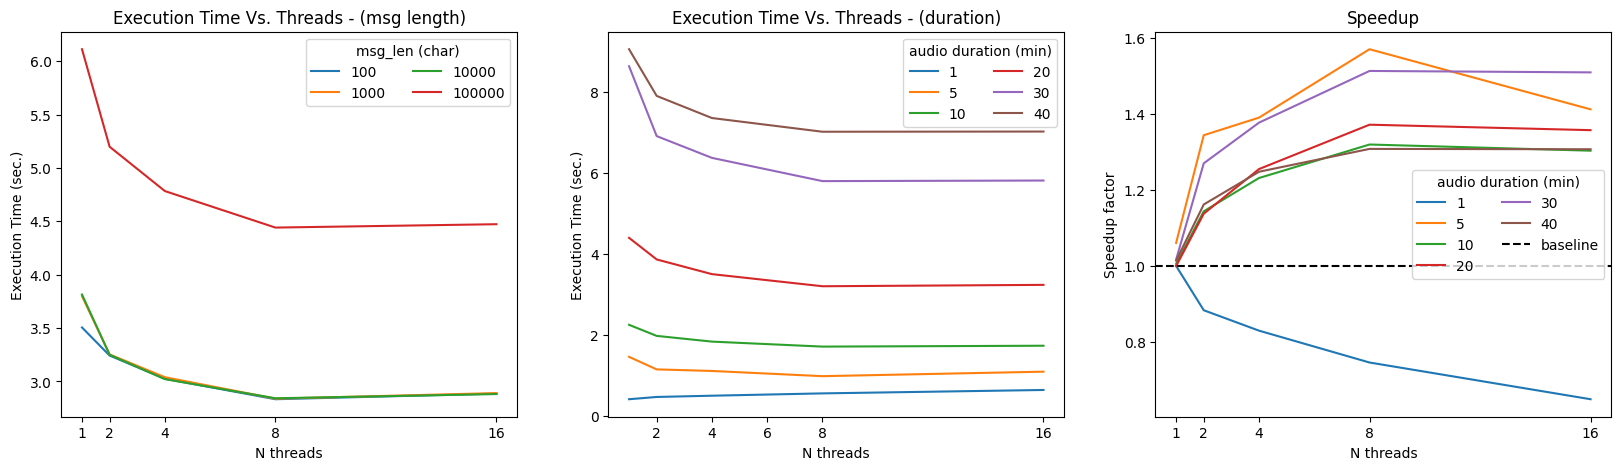

PLOTS FOR CUDA


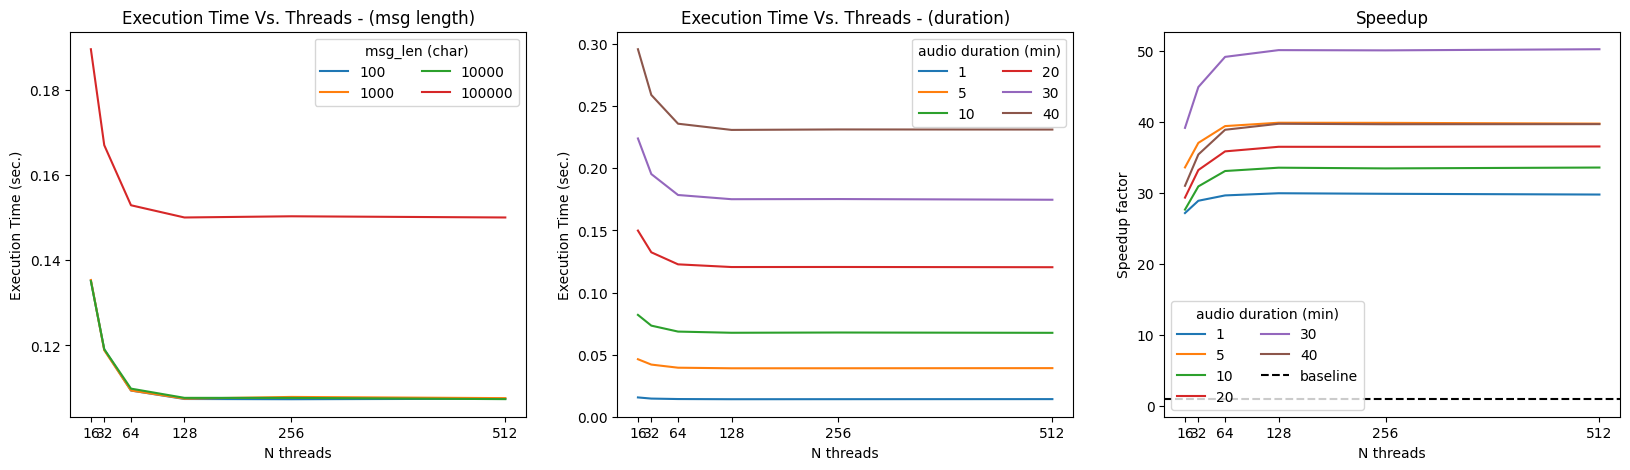

PLOTS FOR MPI


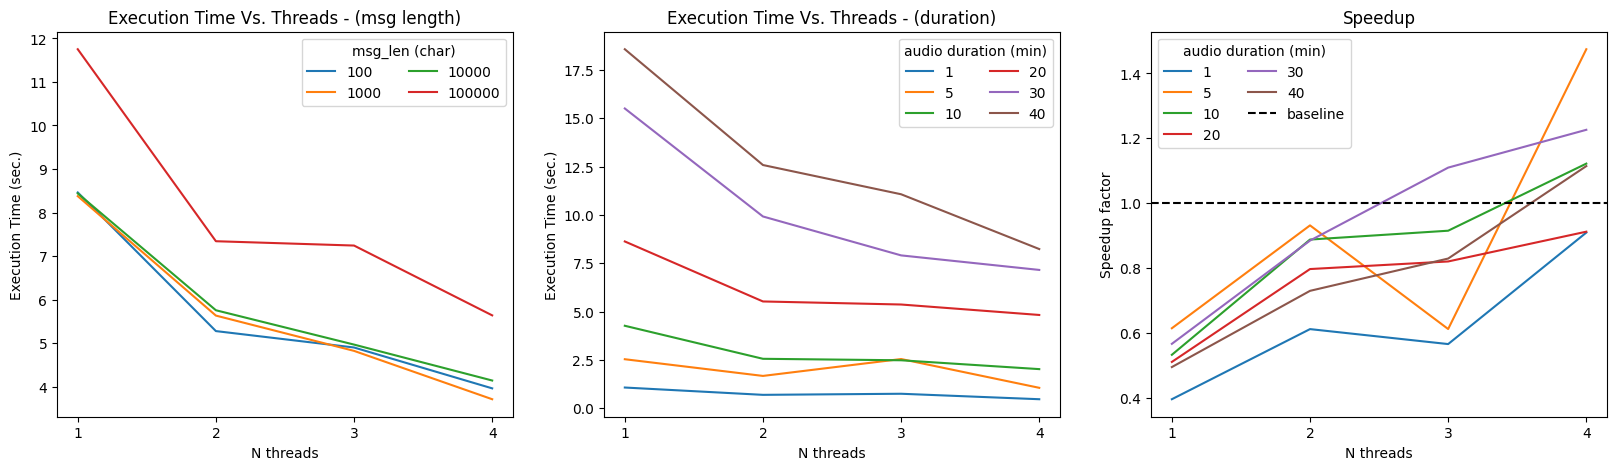

In [167]:
print("PLOTS FOR OMP")
ticks = sorted(omp_data['n_threads'].unique())
df = omp_data

fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(20,5));
plot_time(df[df['elapsed'] != -1], 'n_threads', 'elapsed', 'msg_len', ax=axs[0])
axs[0].set_title('Execution Time Vs. Threads - (msg length)')
axs[0].set_xlabel('N threads');
axs[0].set_ylabel('Execution Time (sec.)')
axs[0].set_xticks(ticks)
axs[0].legend(title='msg_len (char)', ncols=2)


plot_time(df[df['elapsed'] != -1], 'n_threads', 'elapsed', 'duration', ax=axs[1])
axs[1].set_title('Execution Time Vs. Threads - (duration)')
axs[1].set_xlabel('N threads');
axs[1].set_ylabel('Execution Time (sec.)')
axs[1].set_xticks([2, 4, 6, 8, 16])
axs[1].legend(title='audio duration (min)', ncols=2)

plot_speedup(
    df[df['elapsed'] != -1]
    , normal_data[normal_data['elapsed'] != -1]
    , 'n_threads'
    , 'duration'
    , axs[2]
)
axs[2].set_title('Speedup')
axs[2].set_xlabel('N threads');
axs[2].set_ylabel('Speedup factor')
axs[2].set_xticks(ticks)
axs[2].legend(title='audio duration (min)', ncols=2)

plt.show()

print("PLOTS FOR CUDA")
ticks = sorted(cuda_data['n_threads'].unique())
df = cuda_data

fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(20,5));
plot_time(df[df['elapsed'] != -1], 'n_threads', 'elapsed', 'msg_len', ax=axs[0])
axs[0].set_title('Execution Time Vs. Threads - (msg length)')
axs[0].set_xlabel('N threads');
axs[0].set_ylabel('Execution Time (sec.)')
axs[0].set_xticks(ticks)
axs[0].legend(title='msg_len (char)', ncols=2)


plot_time(df[df['elapsed'] != -1], 'n_threads', 'elapsed', 'duration', ax=axs[1])
axs[1].set_title('Execution Time Vs. Threads - (duration)')
axs[1].set_xlabel('N threads');
axs[1].set_ylabel('Execution Time (sec.)')
axs[1].set_xticks(ticks)
axs[1].legend(title='audio duration (min)', ncols=2)

plot_speedup(
    df[df['elapsed'] != -1]
    , normal_data[normal_data['elapsed'] != -1]
    , 'n_threads'
    , 'duration'
    , axs[2]
)
axs[2].set_title('Speedup')
axs[2].set_xlabel('N threads');
axs[2].set_ylabel('Speedup factor')
axs[2].set_xticks(ticks)
axs[2].legend(title='audio duration (min)', ncols=2)

plt.show()

print("PLOTS FOR MPI")
ticks = sorted(mpi_data['n_ranks'].unique())
df = mpi_data

fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(20,5));
plot_time(df[df['elapsed'] != -1], 'n_ranks', 'elapsed', 'msg_len', ax=axs[0])
axs[0].set_title('Execution Time Vs. Threads - (msg length)')
axs[0].set_xlabel('N threads');
axs[0].set_ylabel('Execution Time (sec.)')
axs[0].set_xticks(ticks)
axs[0].legend(title='msg_len (char)', ncols=2)


plot_time(df[df['elapsed'] != -1], 'n_ranks', 'elapsed', 'duration', ax=axs[1])
axs[1].set_title('Execution Time Vs. Threads - (duration)')
axs[1].set_xlabel('N threads');
axs[1].set_ylabel('Execution Time (sec.)')
axs[1].set_xticks(ticks)
axs[1].legend(title='audio duration (min)', ncols=2)

plot_speedup(
    df[df['elapsed'] != -1]
    , normal_data[normal_data['elapsed'] != -1]
    , 'n_ranks'
    , 'duration'
    , axs[2]
)
axs[2].set_title('Speedup')
axs[2].set_xlabel('N threads');
axs[2].set_ylabel('Speedup factor')
axs[2].set_xticks(ticks)
axs[2].legend(title='audio duration (min)', ncols=2)

plt.show()



<function matplotlib.pyplot.show(close=None, block=None)>

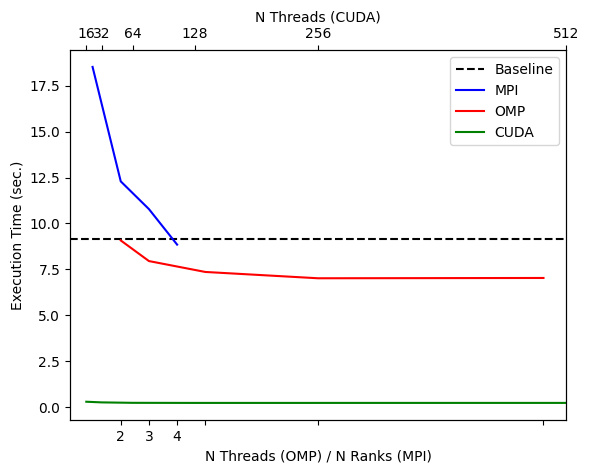

In [168]:
# Worst case comparison
worst_msg_len = 100000
worst_duration = 40

baseline = normal_data.query(f"(msg_len == {worst_msg_len}) & (duration == {worst_duration})")['elapsed'].mean()
omp_worst = omp_data.query(f"(msg_len == {worst_msg_len}) & (duration == {worst_duration})")\
    .groupby(['n_threads'])['elapsed'].mean().reset_index()[['n_threads', 'elapsed']]
cuda_worst = cuda_data.query(f"(msg_len == {worst_msg_len}) & (duration == {worst_duration})")\
    .groupby(['n_threads'])['elapsed'].mean().reset_index()[['n_threads', 'elapsed']]
mpi_worst = mpi_data.query(f"(msg_len == {worst_msg_len}) & (duration == {worst_duration})")\
    .groupby(['n_ranks'])['elapsed'].mean().reset_index()[['n_ranks', 'elapsed']]

fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.axhline(y=baseline, color='black', linestyle='--', label='baseline')
ax1.plot(mpi_worst['n_ranks'], mpi_worst['elapsed'], color='blue')
ax1.plot(omp_worst['n_threads'], omp_worst['elapsed'], color='red')
ax1.set_xticks([1, 2, 3, 4, 8, 16])
ax1.set_ylabel("Execution Time (sec.)")
ax1.set_xlabel("N Threads (OMP) / N Ranks (MPI)")

ax2 = ax1.twiny()
new_tick_locations = [16, 32, 64, 128, 256, 512]
ax2.plot(cuda_worst['n_threads'], cuda_worst['elapsed'], color='green')
ax2.set_xlim(ax1.get_xlim())
ax2.set_xticks(new_tick_locations)
ax2.set_xlabel("N Threads (CUDA)")


legend_elements = [
    Line2D([0], [0], color='black', linestyle='--', lw=1.5, label='Baseline'),
    Line2D([0], [0], color='blue', lw=1.5, label='MPI'),
    Line2D([0], [0], color='red', lw=1.5, label='OMP'),
    Line2D([0], [0], color='green', lw=1.5, label='CUDA'),
]

plt.legend(handles=legend_elements)
plt.show


In [105]:
omp_data.query(f"(msg_len == {worst_msg_len}) & (duration == {worst_duration})")\
    .groupby(['n_threads'])['elapsed'].mean().reset_index()[['n_threads', 'elapsed']]

,n_threads,elapsed
0,1,9.074712
1,2,7.952302
2,4,7.359632
3,8,7.016152
4,16,7.032279


In [98]:
cuda_data.query(f"(msg_len == {worst_msg_len}) & (duration == {worst_duration})")\
    .groupby(['n_threads'])['elapsed'].mean().reset_index()[['n_threads', 'elapsed']]

,n_threads,elapsed
0,16,0.296977
1,32,0.261318
2,64,0.237456
3,128,0.232361
4,256,0.232715
5,512,0.233159


In [100]:
mpi_data.query(f"(msg_len == {worst_msg_len}) & (duration == {worst_duration})")\
    .groupby(['n_ranks'])['elapsed'].mean().reset_index()[['n_ranks', 'elapsed']]

,n_ranks,elapsed
0,1,18.517728
1,2,12.288790
2,3,10.780187
3,4,8.847598
